In [1]:
from matplotlib import pyplot as plt
%matplotlib widget
import matplotlib
matplotlib.use('nbagg')
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams.update({'font.size': 14})
# matplotlib.rcParams.update({'font.family': 'serif'})
# matplotlib.rcParams.update({'text.latex.preamble': 
#                             r'\usepackage[russian]{babel}\usepackage{amsmath}'})

In [2]:
keys = ['name', 'seed', 'required_percentage', 'K', 'alpha', 'Dm', 'd_min', 'eta', 'beta', 'cl_bottom', 'xi',
        'cover_percentage', 'cover_percentage_d', 'sky_cover', 'sky_cover_d', 'n_analytical', 'n_fact']
stats = ['mean', 'min', 'max', 'var', 'std', 'range']
keys += ['w_total_{}'.format(t) for t in stats]
keys += ['q_total_mean']
keys += ['kernel_nodes', 'kernel_km']
keys += ['WINI_{}'.format(t) for t in stats]
keys += ['QINI']
keys += ['freq']
keys += ['BRTC_{}'.format(t) for t in stats] + ['SOLD_{}'.format(t) for t in stats]
keys += ['DTSB_{}'.format(t) for t in stats]

keys += ['WBRT_{}'.format(t) for t in stats] + ['WSOL_{}'.format(t) for t in stats]
keys += ['DWSB_{}'.format(t) for t in stats]
keys += ['DWBI_{}'.format(t) for t in stats] + ['DWSI_{}'.format(t) for t in stats]
keys += ['DWSBI_{}'.format(t) for t in stats]
keys += ['DWBII_{}'.format(t) for t in stats] + ['DWSII_{}'.format(t) for t in stats]

keys += ['QBRT_{}'.format(t) for t in stats] + ['QSOL_{}'.format(t) for t in stats]
keys += ['DQSB_{}'.format(t) for t in stats]
keys += ['DQBI_{}'.format(t) for t in stats] + ['DQSI_{}'.format(t) for t in stats]
keys += ['DQSBI_{}'.format(t) for t in stats]
keys += ['DQBII_{}'.format(t) for t in stats] + ['DQSII_{}'.format(t) for t in stats]

keys += ['OPBC_{}'.format(t) for t in stats]
keys += ['OPSD_{}'.format(t) for t in stats]
keys += ['DOSB_{}'.format(t) for t in stats]

ids = {}
for i, key in enumerate(keys):
    ids[key] = i
len(keys)

166

In [3]:
import re

data = []
with open('db.txt', 'r') as db:
    db.readline()
    for line in db:
        line = re.sub('[\r\n]', '', line)
        line = re.split('[ \t]', line)
        name = [line[0]]
        vals = [float(val) for val in line[1:] if val not in ['']]
        data.append(name + vals)
print(len(data[0]))

166


In [4]:
import numpy as np
data = np.array(data, dtype=object)
data[:, ids['name']]

array(['L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2',
       'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2',
       'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2',
       'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2',
       'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2',
       'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2',
       'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2', 'L2',
       'L2', 'L2', 'L2'], dtype=object)

#### L2, L3, T6, T7, T8, T9

In [5]:
from scipy.optimize import curve_fit

In [6]:
import os

In [7]:
def WINI(cat):
    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 36)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WINI_mean']]
    # show range
    _min = data[cond][:, ids['WINI_min']]
    _max = data[cond][:, ids['WINI_max']]
    print(_max)
    print(mean)
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    # show variance
    # err = data[cond][:, ids['WINI_var']]

    plt.figure()
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r'Initial LWC, kg$\cdot$m$^{-2}$')
    plt.errorbar(percentage, mean, err, fmt='bo', markersize=6, capsize=5, alpha=0.5)

    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='black', linestyle='--')
    plt.ylim((-0.5, 1))
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'WINI.png'), dpi=300)

In [8]:
def BRTC(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"BTs of Plank's cloudfield, K")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 22.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['BRTC_mean']]
    # err = data[cond][:, ids['BRTC_std']]
    _min = data[cond][:, ids['BRTC_min']]
    _max = data[cond][:, ids['BRTC_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 GHz', alpha=1)
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['BRTC_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5)
    plt.scatter(percentage, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['BRTC_mean']]
    # err = data[cond][:, ids['BRTC_std']]
    _min = data[cond][:, ids['BRTC_min']]
    _max = data[cond][:, ids['BRTC_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='36 GHz', alpha=1)
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['BRTC_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5)
    plt.scatter(percentage, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['BRTC_mean']]
    # err = data[cond][:, ids['BRTC_std']]
    _min = data[cond][:, ids['BRTC_min']]
    _max = data[cond][:, ids['BRTC_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='89 GHz', alpha=1)
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['BRTC_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5)
    plt.scatter(percentage, mean, color='forestgreen', marker='^')

    plt.legend(loc='best', frameon=False)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'BRTC.png'), dpi=300)

In [9]:
def SOLD(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"BTs of the equivalent flat layer, K")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 22.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['SOLD_mean']]
    # err = data[cond][:, ids['SOLD_std']]
    _min = data[cond][:, ids['SOLD_min']]
    _max = data[cond][:, ids['SOLD_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 GHz', alpha=1)
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['SOLD_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5)
    plt.scatter(percentage, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['SOLD_mean']]
    # err = data[cond][:, ids['SOLD_std']]
    _min = data[cond][:, ids['SOLD_min']]
    _max = data[cond][:, ids['SOLD_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='36 GHz', alpha=1)
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['SOLD_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5)
    plt.scatter(percentage, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['SOLD_mean']]
    # err = data[cond][:, ids['SOLD_std']]
    _min = data[cond][:, ids['SOLD_min']]
    _max = data[cond][:, ids['SOLD_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='89 GHz', alpha=1)
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['SOLD_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5)
    plt.scatter(percentage, mean, color='forestgreen', marker='^')

    plt.legend(loc='best', frameon=False)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'SOLD.png'), dpi=300)

In [10]:
def DTSB(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"$\Delta T_b(\nu)$, K")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 22.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DTSB_mean']]
    _min = data[cond][:, ids['DTSB_min']]
    _max = data[cond][:, ids['DTSB_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DTSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DTSB_mean']]
    _min = data[cond][:, ids['DTSB_min']]
    _max = data[cond][:, ids['DTSB_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='36 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DTSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DTSB_mean']]
    _min = data[cond][:, ids['DTSB_min']]
    _max = data[cond][:, ids['DTSB_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='89 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DTSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )
    plt.scatter(percentage, mean, color='forestgreen', marker='^')

    plt.legend(loc='best', frameon=False)
    # plt.yscale('log')
    plt.ylim((-5, 40))
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'DTSB.png'), dpi=300)

In [11]:
def WBRT(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"Retrieved LWC (1), kg$\cdot$m$^{-2}$")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 27.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WBRT_mean']]
    _min = data[cond][:, ids['WBRT_min']]
    _max = data[cond][:, ids['WBRT_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 and 27.2 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WBRT_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WBRT_mean']]
    _min = data[cond][:, ids['WBRT_min']]
    _max = data[cond][:, ids['WBRT_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='22.2 and 36 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WBRT_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WBRT_mean']]
    _min = data[cond][:, ids['WBRT_min']]
    _max = data[cond][:, ids['WBRT_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='22.2 and 89 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WBRT_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )
    plt.scatter(percentage, mean, color='forestgreen', marker='^')

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 36)
    kernel = (data[:, ids['kernel_km']] == 10)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WINI_mean']]
    _min = data[cond][:, ids['WINI_min']]
    _max = data[cond][:, ids['WINI_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[3::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='+', markersize=6, capsize=5, color='black')
    # plt.scatter(percentage, mean, color='black', alpha=1)
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WINI_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='black', linestyle=':', label='Initial LWC')
    plt.scatter(percentage, mean, color='black', marker='+')

    plt.legend(loc='best', frameon=True)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'WBRT.png'), dpi=300)

In [12]:
def WSOL(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"Retrieved LWC (2), kg$\cdot$m$^{-2}$")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 27.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WSOL_mean']]
    _min = data[cond][:, ids['WSOL_min']]
    _max = data[cond][:, ids['WSOL_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 and 27.2 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WSOL_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WSOL_mean']]
    _min = data[cond][:, ids['WSOL_min']]
    _max = data[cond][:, ids['WSOL_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='22.2 and 36 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WSOL_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WSOL_mean']]
    _min = data[cond][:, ids['WSOL_min']]
    _max = data[cond][:, ids['WSOL_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='22.2 and 89 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WSOL_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 36)
    kernel = (data[:, ids['kernel_km']] == 10)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WINI_mean']]
    _min = data[cond][:, ids['WINI_min']]
    _max = data[cond][:, ids['WINI_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[3::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='+', markersize=6, capsize=5, color='black')
    # plt.scatter(percentage, mean, color='black', alpha=1)
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['WINI_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='black', linestyle=':', label='Initial LWC')
    plt.scatter(percentage, mean, color='black', marker='+')

    plt.legend(loc='best', frameon=True)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'WSOL.png'), dpi=300)

In [20]:
def QBRT(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"Retrieved TWV (1), g$\cdot$cm$^{-2}$")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 27.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QBRT_mean']]
    _min = data[cond][:, ids['QBRT_min']]
    _max = data[cond][:, ids['QBRT_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 and 27.2 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QBRT_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QBRT_mean']]
    _min = data[cond][:, ids['QBRT_min']]
    _max = data[cond][:, ids['QBRT_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='22.2 and 36 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QBRT_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QBRT_mean']]
    _min = data[cond][:, ids['QBRT_min']]
    _max = data[cond][:, ids['QBRT_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='22.2 and 89 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QBRT_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )
    plt.scatter(percentage, mean, color='forestgreen', marker='^')

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 36)
    kernel = (data[:, ids['kernel_km']] == 10)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QINI']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='black', linestyle=':', label='Initial TWV')
    plt.scatter(percentage, mean, color='black', marker='+')

    plt.legend(loc='best', frameon=True)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'QBRT.png'), dpi=300)

In [21]:
def QSOL(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"Retrieved TWV (2), g$\cdot$cm$^{-2}$")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 27.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QSOL_mean']]
    _min = data[cond][:, ids['QSOL_min']]
    _max = data[cond][:, ids['QSOL_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 and 27.2 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QSOL_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QSOL_mean']]
    _min = data[cond][:, ids['QSOL_min']]
    _max = data[cond][:, ids['QSOL_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='22.2 and 36 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QSOL_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QSOL_mean']]
    _min = data[cond][:, ids['QSOL_min']]
    _max = data[cond][:, ids['QSOL_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::4, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='22.2 and 89 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QSOL_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 36)
    kernel = (data[:, ids['kernel_km']] == 10)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['QINI']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='black', linestyle=':', label='Initial TWV')
    plt.scatter(percentage, mean, color='black', marker='+')

    plt.legend(loc='best', frameon=True)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'QSOL.png'), dpi=300)

In [15]:
def DWSB(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"$\Delta^{(2)-(1)}_{LWC}$, kg$\cdot$m$^{-2}$")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 27.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DWSB_mean']]
    _min = data[cond][:, ids['DWSB_min']]
    _max = data[cond][:, ids['DWSB_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 and 27.2 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DWSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DWSB_mean']]
    _min = data[cond][:, ids['DWSB_min']]
    _max = data[cond][:, ids['DWSB_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='22.2 and 36 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DWSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DWSB_mean']]
    _min = data[cond][:, ids['DWSB_min']]
    _max = data[cond][:, ids['DWSB_max']]
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='22.2 and 89 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = data[cond][:, ids['DWSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )
    plt.scatter(percentage, mean, color='forestgreen', marker='^')

    plt.legend(loc='best', frameon=True)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'DWSB.png'), dpi=300)

In [16]:
def DWBII(cat):
    plt.figure()
    plt.xlabel(r'Cloud amount, $\%$')
    plt.ylabel(r"Relative error in LWC (1), $\%$")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 27.2)
    kernel_km = 10
    kernel = (data[:, ids['kernel_km']] == kernel_km)
    plt.title('{}'.format(kernel_km)+r'$\times$'+'{} km'.format(kernel_km)+' convolution')
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = np.abs(data[cond][:, ids['DWBII_mean']]) * 100
    _min = np.abs(data[cond][:, ids['DWBII_min']]) * 100
    _max = np.abs(data[cond][:, ids['DWBII_max']]) * 100
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[2::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 and 27.2 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = np.abs(data[cond][:, ids['DWBII_mean']]) * 100
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = np.abs(data[cond][:, ids['DWBII_mean']]) * 100
    _min = np.abs(data[cond][:, ids['DWBII_min']]) * 100
    _max = np.abs(data[cond][:, ids['DWBII_max']]) * 100
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[1::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='o', markersize=6, capsize=5, label='22.2 and 36 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = np.abs(data[cond][:, ids['DWBII_mean']]) * 100
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )
    plt.scatter(percentage, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & kernel
    percentage = data[cond][:, ids['cover_percentage']]
    mean = np.abs(data[cond][:, ids['DWBII_mean']]) * 100
    _min = np.abs(data[cond][:, ids['DWBII_min']]) * 100
    _max = np.abs(data[cond][:, ids['DWBII_max']]) * 100
    s = np.array(sorted(list(zip(percentage, mean, _min, _max)), key=lambda item: item[0]))
    percentage, mean, _min, _max = [s[0::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(percentage, mean, err, fmt='^', markersize=6, capsize=5, label='22.2 and 89 GHz')
    percentage = data[cond][:, ids['cover_percentage']]
    mean = np.abs(data[cond][:, ids['DWBII_mean']]) * 100
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(percentage, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )
    plt.scatter(percentage, mean, color='forestgreen', marker='^')

    plt.legend(loc='best', frameon=False)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'DWBII.png'), dpi=300)

In [17]:
def DTSBkm(cat):
    plt.figure()
    plt.xlabel(r'Resolution element, km')
    plt.ylabel(r"$\Delta T_b(\nu)$, K")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 22.2)
    required_p = (63 < data[:, ids['required_percentage']]) & (data[:, ids['required_percentage']] < 65)
    cond = category & frequency & required_p
    percentage = np.mean(data[cond][:, ids['required_percentage']])
    plt.title('{:.2f}'.format(percentage)+r'$\%$ cloud amount')
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DTSB_mean']]
    _min = data[cond][:, ids['DTSB_min']]
    _max = data[cond][:, ids['DTSB_max']]
    s = np.array(sorted(list(zip(kernel, mean, _min, _max)), key=lambda item: item[0]))
    kernel, mean, _min, _max = [s[2::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(kernel, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 GHz')
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DTSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(kernel, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    # plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )
    plt.scatter(kernel, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & required_p
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DTSB_mean']]
    _min = data[cond][:, ids['DTSB_min']]
    _max = data[cond][:, ids['DTSB_max']]
    s = np.array(sorted(list(zip(kernel, mean, _min, _max)), key=lambda item: item[0]))
    kernel, mean, _min, _max = [s[1::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(kernel, mean, err, fmt='o', markersize=6, capsize=5, label='36 GHz')
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DTSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(kernel, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    # plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )
    plt.scatter(kernel, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & required_p
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DTSB_mean']]
    _min = data[cond][:, ids['DTSB_min']]
    _max = data[cond][:, ids['DTSB_max']]
    s = np.array(sorted(list(zip(kernel, mean, _min, _max)), key=lambda item: item[0]))
    kernel, mean, _min, _max = [s[0::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(kernel, mean, err, fmt='^', markersize=6, capsize=5, label='89 GHz')
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DTSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(kernel, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    # plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )
    plt.scatter(kernel, mean, color='forestgreen', marker='^')

    plt.legend(loc='best', frameon=False)
    # plt.yscale('log')
    plt.ylim((-5, 40))
    # plt.xlim((-0.9, 17))
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'DTSBKM.png'), dpi=300)

In [18]:
def DWSBkm(cat):
    plt.figure()
    plt.xlabel(r'Resolution element, km')
    plt.ylabel(r"$\Delta^{(2)-(1)}_{LWC}$, kg$\cdot$m$^{-2}$")

    category = (data[:, ids['name']] == cat)
    frequency = (data[:, ids['freq']] == 27.2)
    required_p = (63 < data[:, ids['required_percentage']]) & (data[:, ids['required_percentage']] < 65)
    cond = category & frequency & required_p
    percentage = np.mean(data[cond][:, ids['required_percentage']])
    plt.title('{:.2f}'.format(percentage)+r'$\%$ cloud amount')
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DWSB_mean']]
    _min = data[cond][:, ids['DWSB_min']]
    _max = data[cond][:, ids['DWSB_max']]
    s = np.array(sorted(list(zip(kernel, mean, _min, _max)), key=lambda item: item[0]))
    kernel, mean, _min, _max = [s[2::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(kernel, mean, err, fmt='x', markersize=6, capsize=5, label='22.2 and 27.2 GHz')
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DWSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(kernel, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    # plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkblue', linestyle='--', alpha=0.5, )
    plt.scatter(kernel, mean, color='darkblue', marker='x')

    frequency = (data[:, ids['freq']] == 36)
    cond = category & frequency & required_p
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DWSB_mean']]
    _min = data[cond][:, ids['DWSB_min']]
    _max = data[cond][:, ids['DWSB_max']]
    s = np.array(sorted(list(zip(kernel, mean, _min, _max)), key=lambda item: item[0]))
    kernel, mean, _min, _max = [s[1::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(kernel, mean, err, fmt='o', markersize=6, capsize=5, label='22.2 and 36 GHz')
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DWSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(kernel, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    # plt.plot(s[:, 0], func(s[:, 0], *popt), color='darkorange', linestyle='-', alpha=0.5, )
    plt.scatter(kernel, mean, color='darkorange', marker='o')

    frequency = (data[:, ids['freq']] == 89)
    cond = category & frequency & required_p
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DWSB_mean']]
    _min = data[cond][:, ids['DWSB_min']]
    _max = data[cond][:, ids['DWSB_max']]
    s = np.array(sorted(list(zip(kernel, mean, _min, _max)), key=lambda item: item[0]))
    kernel, mean, _min, _max = [s[0::3, i] for i in range(4)]
    err = np.asarray(list(zip(mean - _min, _max - mean))).T
    plt.errorbar(kernel, mean, err, fmt='^', markersize=6, capsize=5, label='22.2 and 89 GHz')
    kernel = data[cond][:, ids['kernel_km']]
    mean = data[cond][:, ids['DWSB_mean']]
    func = lambda x, a, b, c: a * x*x + b * x + c
    s = np.asarray(sorted(list(zip(kernel, mean)), key=lambda elem: elem[0]))
    popt, pcov = curve_fit(func, s[:, 0], s[:, 1])
    # plt.plot(s[:, 0], func(s[:, 0], *popt), color='forestgreen', linestyle='-.', alpha=0.5, )
    plt.scatter(kernel, mean, color='forestgreen', marker='^')

    plt.legend(loc='best', frameon=True)
    
    if not os.path.exists(cat):
        os.makedirs(cat)
    plt.savefig(os.path.join(cat, 'DWSBKM.png'), dpi=300)

# L2

[0.37177699196695 0.3671630297251885 0.5376096327393234 0.6095915293458115
 0.6369702035186114 0.5332163595214158 0.6416571474279754
 0.435334405542034 0.550948456445857 0.5502820873904603 0.5307405322950522
 0.5162883715833398 0.5573208262225458 0.600128571083505 0.630509983720259
 0.5983486968123619 0.5091012483454892 0.5170672415654777
 0.6446822156213855 0.6086230702724071]
[0.10460344091530697 0.09428406959701266 0.19171968052237975
 0.27057813268215486 0.300188292824854 0.1856830752456218
 0.3098364201813047 0.12085622574301665 0.2175967787756698
 0.21382151257455342 0.17089264668837906 0.15101852815632472
 0.22468120640214953 0.25361218875398417 0.29431037953800854
 0.2511735757224062 0.1453936154948101 0.16429420193453106
 0.3189083089847799 0.26223110750296724]


<IPython.core.display.Javascript object>


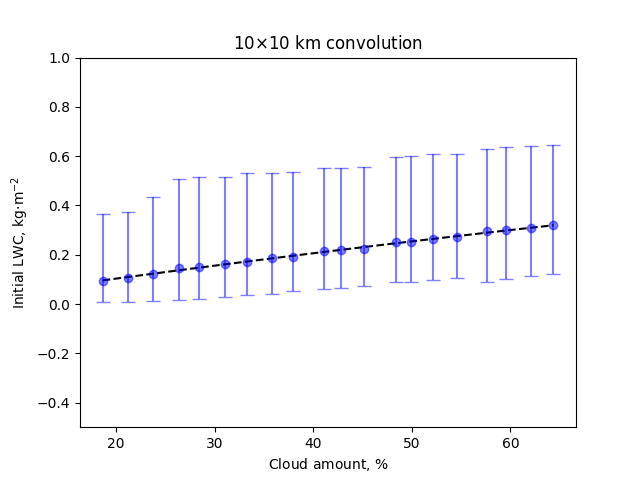

In [19]:
# INITIAL LWC (CONVOLVED)
WINI('L2')

<IPython.core.display.Javascript object>


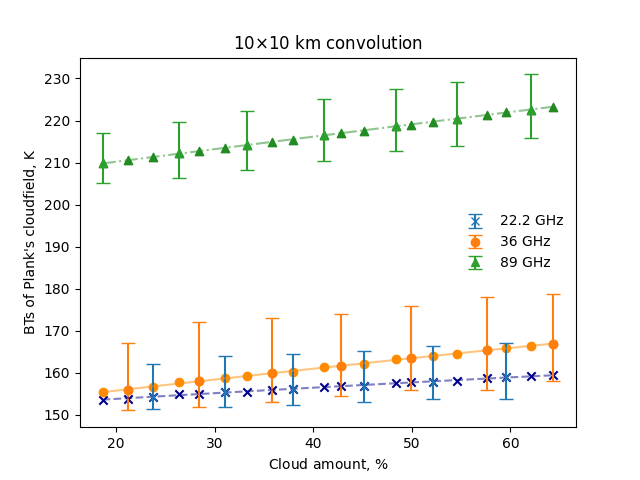

In [22]:
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC('L2')

<IPython.core.display.Javascript object>


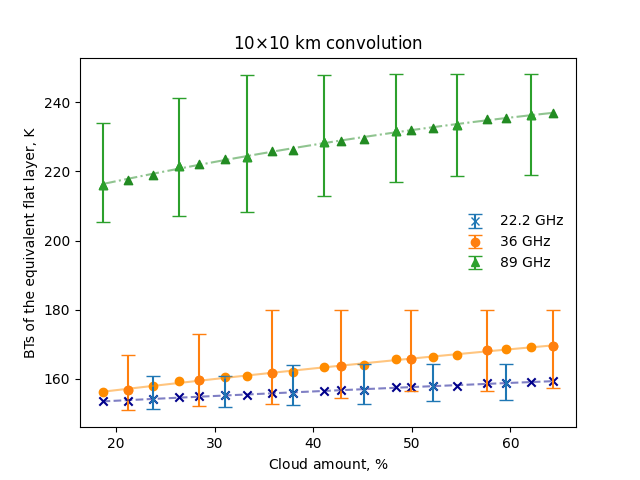

In [23]:
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD('L2')

<IPython.core.display.Javascript object>


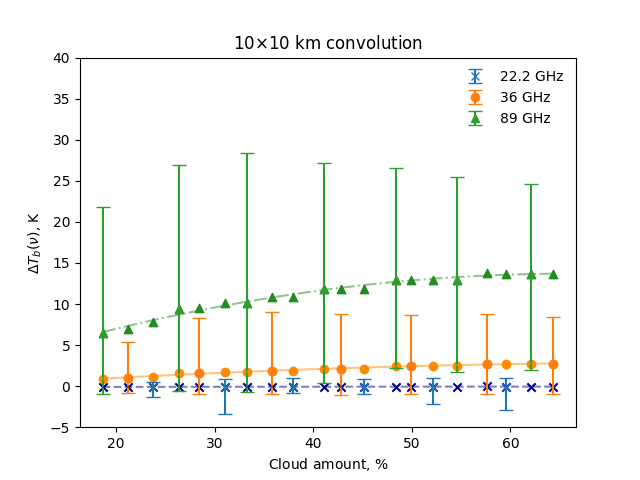

In [24]:
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB('L2')

<IPython.core.display.Javascript object>


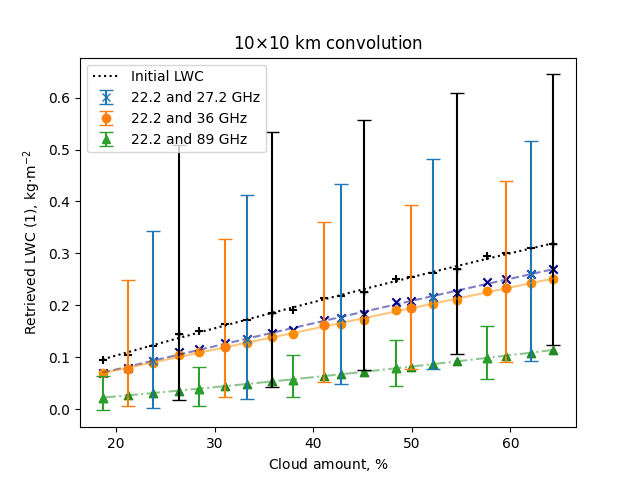

In [25]:
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT('L2')

<IPython.core.display.Javascript object>


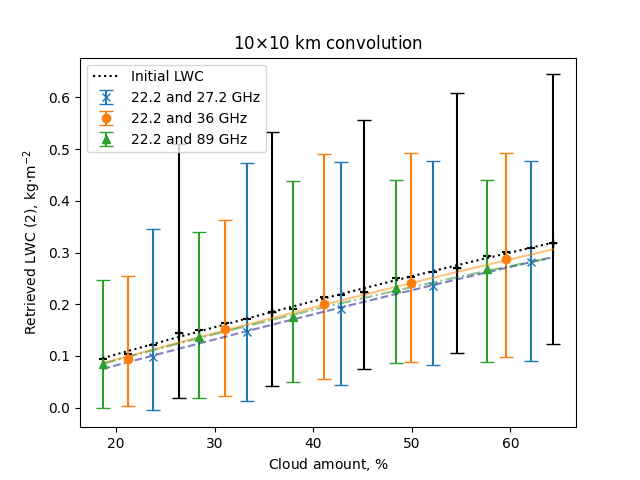

In [26]:
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL('L2')

<IPython.core.display.Javascript object>


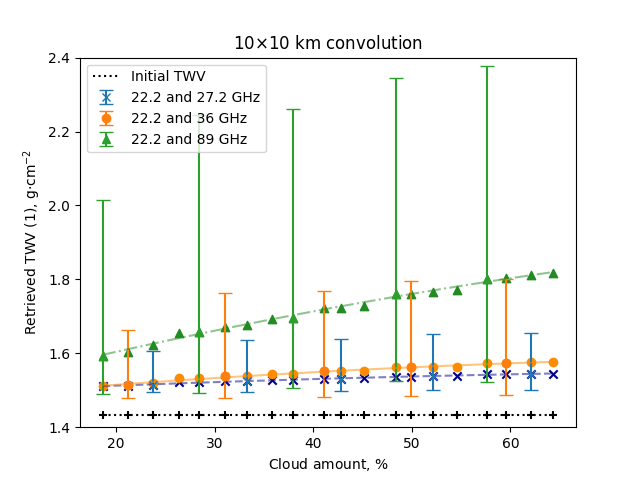

(1.4, 2.4)

In [29]:
QBRT('L2')
plt.ylim((1.4, 2.4))

<IPython.core.display.Javascript object>


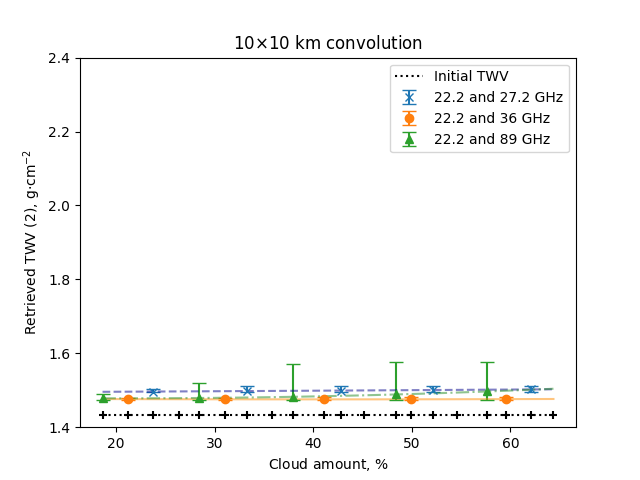

(1.4, 2.4)

In [30]:
QSOL('L2')
plt.ylim((1.4, 2.4))

In [ ]:
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB('L2')

In [ ]:
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII('L2')

In [ ]:
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm('L2')

In [ ]:
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm('L2')

# L3

In [ ]:
# INITIAL LWC (CONVOLVED)
WINI('L3')

In [ ]:
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC('L3')

In [ ]:
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD('L3')

In [ ]:
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB('L3')

In [ ]:
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT('L3')

In [ ]:
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL('L3')

In [ ]:
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB('L3')

In [ ]:
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII('L3')

In [ ]:
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm('L3')

In [ ]:
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm('L3')

# T6

In [ ]:
cat = 'T6'
# INITIAL LWC (CONVOLVED)
WINI(cat)

In [ ]:
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)

In [ ]:
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)

In [ ]:
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)

In [ ]:
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)

In [ ]:
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)

In [ ]:
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)

In [ ]:
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)

In [ ]:
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)

In [ ]:
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# T7

In [ ]:
cat = 'T7'
# INITIAL LWC (CONVOLVED)
WINI(cat)
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# T8

In [ ]:
cat = 'T8'
# INITIAL LWC (CONVOLVED)
WINI(cat)
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# T9

In [ ]:
cat = 'T9'
# INITIAL LWC (CONVOLVED)
WINI(cat)
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# T1

In [ ]:
cat = 'T1'
# INITIAL LWC (CONVOLVED)
WINI(cat)

In [ ]:
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)

In [ ]:
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)

In [ ]:
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)

In [ ]:
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)

In [ ]:
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)

In [ ]:
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)

In [ ]:
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)

In [ ]:
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)

In [ ]:
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# T2

In [ ]:
cat = 'T2'
# INITIAL LWC (CONVOLVED)
WINI(cat)
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# T3

In [ ]:
cat = 'T3'
# INITIAL LWC (CONVOLVED)
WINI(cat)
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# T4

In [ ]:
cat = 'T4'
# INITIAL LWC (CONVOLVED)
WINI(cat)
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# T5

In [ ]:
cat = 'T5'
# INITIAL LWC (CONVOLVED)
WINI(cat)
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)

# L1

In [ ]:
cat = 'L1'
# INITIAL LWC (CONVOLVED)
WINI(cat)
# BRIGHTNESS TEMPERATURES OF PLANK's CLOUDFIELD (CONVOLVED)
BRTC(cat)
# BRIGHTNESS TEMPERATURE OF THE EQUIVALENT FLAT LAYER (CONVOLVED)
SOLD(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSB(cat)
# LWC RETRIEVED-1 (CONVOLVED)
# Сначала получаем карту яркостных температур, потом усредняем её и решаем обратную задачу.
WBRT(cat)
# LWC RETRIEVED-2 (CONVOLVED)
# Сначала усредняем водозапас в элементе разрешения, потом решаем прямую задачу, 
# получаем яркостную температуру эквивалентного плоского слоя, а затем решаем обратную задачу. 
WSOL(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSB(cat)
# The relative error of LWC retrieval (CONVOLVED) DWBII
DWBII(cat)
# DELTA OF BRIGHTNESS TEMPERATURES (CONVOLVED)
DTSBkm(cat)
# Difference between the retrieved LWCs (CONVOLVED) DWSB
DWSBkm(cat)